# CS5228 Assignment 1a - Clustering (50 Points)

Hello everyone, this answer sheet contains some task to practice that you learned in culstering section. There are some code-completion tasks and question-answering tasks in this answer sheet. 

For code completion task, please write down your answer between sentences that "your code starts here" and "your code end here". The space between does not reflect reflect the required or expected lines of code :).

For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed) 

**Important:** Remember to save this Jupyter notebook as A1a_YourNameInLumiNUS_YourNUSNETID.ipynb.

Please also add your nusnet and student id also in the code cell below. We want try some auto-checking to hopefully speed up the grading.

In [1]:
student_id = 'A0224917B'
nusnet_id = 'E0575551'

## Setting up the Notebook

`%matplotlib notebook` allows to resize and zoom into plots. However, sometimes it's a bit flaky and showing only empty plots. Just give it a try. `%matplotlib inline` should always work.

In [2]:
#%matplotlib notebook
%matplotlib inline

The following statements contain all the packages need to complete the notebook.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

# We provide you with some utility methods to plot the data
from src.utils import plot_clusters, plot_labeled_data, calculate_sse

If you use `%matplotlib inline` should always work, with the commands below you can adjust the default size and resolution of plots as you need.

In [4]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 100

## 1. Implementing K-Means (22 Points)

Your task is to implement K-Means clustering. But no need to worry, we guide you through this task step by step so you can focus on the key steps of the algorithm.

### Creating some Toy Data

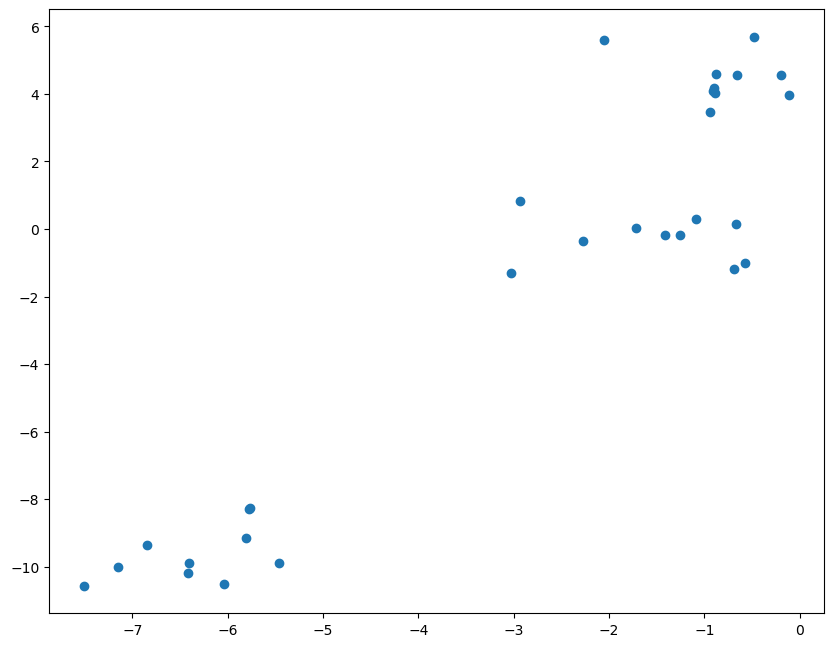

In [5]:
X_kmeans, _ = make_blobs(n_samples=30, centers=3, n_features=2, cluster_std=0.85, random_state=11)

plt.figure()
plt.scatter(X_kmeans[:,0], X_kmeans[:,1])
plt.show()

We set k=5 here simply to have value for k for testing your code.

In [6]:
k = 5

### 1.1 Initialization of Centroids (3 Points)

As we learned in the lecture, K-Means is rather sensitive to the initialization of the clusters. For this assignment we use a very basic approach: all K centroids are randomly picked from the dataset. It's not ideal will do the trick here, and it's very easy to implement.

The mehtod `init_centroids()` should return a list of *k* different data points. Example format for 2d data points and *k=3*:

`centroids = [ [2.35, -4.02 ], [0.64, 9.77 ], [ -3.50, 2,91 ] ]`

In [7]:
def init_centroids(X, k):
    centroids = None
    
    ### Your code starts here ###############################################################
    num_samples, num_dimensions = X.shape
    Range_Max = X.max(axis = 0)
    Range_Min = X.min(axis = 0)
    centroids = np.random.rand(k,num_dimensions)
    for i in range(num_dimensions):
        centroids[:,i] = Range_Min[i] + centroids[:,i] * (Range_Max[i] - Range_Min[i])
    
    ### Your code ends here #################################################################
    
    return centroids


#
# Example format:
#
# centroids = [ [2.35, -4.02 ], [0.64, 9.77 ], [ -3.50, 2,91 ] ]
#
centroids = init_centroids(X_kmeans, k)
print(centroids)
print(X_kmeans[0])
range(k)

[[-5.59888264  3.2171179 ]
 [-1.40155103  2.60412426]
 [-5.18562057 -2.38849388]
 [-0.68161236 -0.09142244]
 [-2.50153953 -5.60680197]]
[-1.2599977  -0.18702064]


range(0, 5)

### 1.2 Cluster Assignment (4 Points)

In this step, each data point is assigned to its nearest centroid. Calculating distances and finding the smallest values is very easy with `numpy`: you may want to check [`numpy.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) and [`numpy.argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html).

The method `assign_clusters()` should return a dictionary where the keys represent the ids of the *k* cluster ranging from *0* to *k-1*, and each value is a list of indices of the data points belonging to the respective cluster. For example,

`
clusters = {
   0: [2, 4, 6, 8],
   1: [0, 1, 5],
   2: [3, 7, 9]
}
`

is a clustering with 3 clusters (*k=3*), where the first cluster contains the indices to the 2nd, 4th, 6th and 8th data point in `X`; for this example `X` contains 10 data points overall.

In [8]:
def assign_clusters(X, k, centroids):
    # Reset all clusters
    clusters = {key: [] for key in range(k)}

    for idx, x in enumerate(X):
        
        ### Your code starts here ###############################################################
        cluster_id = 0
        Temp_array = np.zeros(k)
        for i in range(k):
            Temp_array[i] = np.linalg.norm(x - centroids[i])
            pass
        cluster_id = np.argmin(Temp_array)
        clusters[cluster_id].append(idx)
        ### Your code ends here #################################################################
        
        # Only there so the empty loop does not throw an error
        # (you can remove that once you added your code)
        pass

    return clusters

#
# Example format
#
#clusters = {
#   0: [2, 4, 6, 8],
#   1: [0, 1, 5],
#   2: [3, 7, 9]
#}
clusters = assign_clusters(X_kmeans, k, centroids)
print(clusters)

{0: [], 1: [3, 11, 12, 17, 18, 19, 20, 22, 25, 26, 27], 2: [15], 3: [0, 1, 2, 5, 6, 7, 23, 24], 4: [4, 8, 9, 10, 13, 14, 16, 21, 28, 29]}


### 1.3 Update of Centroids (5 Points)

After the assignment of the data points to clusters, all centroids need to be moved to the average of their respective clusters. Note that the centroids might not change because the assignment made no changes to the clusters and K-Means is done. But we don't have to worry about that here.

The method `update_centroids()` should return a list of the same format as the method `init_centroids()`; see above.

In [9]:
def update_centroids(X, clusters, centroids):
    
    new_centroids = np.zeros_like(centroids)

    ### Your code starts here ###############################################################
    for ithcluster in range(len(centroids)):
        if(np.size(clusters[ithcluster]) != 0 ):
            Temp_centroid = np.mean(X[clusters[ithcluster]], axis = 0)
            new_centroids[ithcluster] = Temp_centroid
        else:
            new_centroids[ithcluster] = centroids[ithcluster]
        pass
    
    ### Your code ends here #################################################################
    
    return new_centroids


# Example format:
#
# centroids = [ [2.35, -4.02 ], [0.64, 9.77 ], [ -3.50, 2,91 ] ]
#
centroids = update_centroids(X_kmeans, clusters, centroids)
print(centroids)

[[-5.59888264  3.2171179 ]
 [-0.9957844   4.13449022]
 [-3.02742217 -1.29935001]
 [-1.20893623 -0.30431639]
 [-6.31800634 -9.60821426]]


### 1.4 Putting it all together (4 Points)

With the initialization of the centroids, the assignment to cluster, and the update of the centroids in place, you can now combine all three steps into a single method to perform K-Means over a dataset X given a choice for k. Don't forget to stop once you found all clusters. There a different ways to do it. However, we recommend to have a look at [`numpy.all`](https://numpy.org/doc/stable/reference/generated/numpy.all.html).

The method `kmeans` should return a clustering (same format as `assign_clusters()` and `update_centroids`), as well as the list of centroids after convergence (same format as `init_centroids()`).

In [10]:
def kmeans(X, k, max_iter=100, verbose=False):
    clusters, num_iterations = {}, 0
    
    centroids = init_centroids(X, k)

    for _ in range(max_iter):
        # Update the counter (+1 since we start from 0)
        num_iterations = num_iterations + 1
        
        ### Your code starts here ###############################################################
    clusters = assign_clusters(X, k, centroids)
    centroids = update_centroids(X, clusters, centroids)
    
        ### Your code ends here #################################################################
    
    # Let's print the number of comparison
    if verbose is True:
        print('K-Means required {} iterations to converge.'.format(num_iterations))
    
    return clusters, centroids

#
# Example format
#
# clusters = {
#    0: [2, 4, 6, 8],
#    1: [0, 1, 5],
#    2: [3, 7, 9]
# }
#
# centroids = [ [2.35, -4.02 ], [0.64, 9.77 ], [ -3.50, 2,91 ] ]

### Test your Implementation

Run your implementation of K-Means over the generated dataset and visualize the results using the `plot_clusters` method we provide for you. This allows you to check if your implementation is (seemingly) correct -- **important:** note that an unlucky initialization might yield poor result, so you might run K-Means multiple times before you pass judgment on you implementation :).

To get a better sense of inner workings, you can generate different datasets (e.g., different number of data points or number of blobs) and see if the results look meaningful

{0: [4, 8, 9, 10, 13, 14, 16, 21, 28, 29], 1: [1, 3, 11, 12, 17, 18, 19, 20, 22, 25, 26], 2: [0, 2, 5, 6, 7, 15, 23, 24, 27]}
[[-6.31800634 -9.60821426]
 [-0.78983672  4.07443989]
 [-1.66270405 -0.34148084]]
44.82756066626766


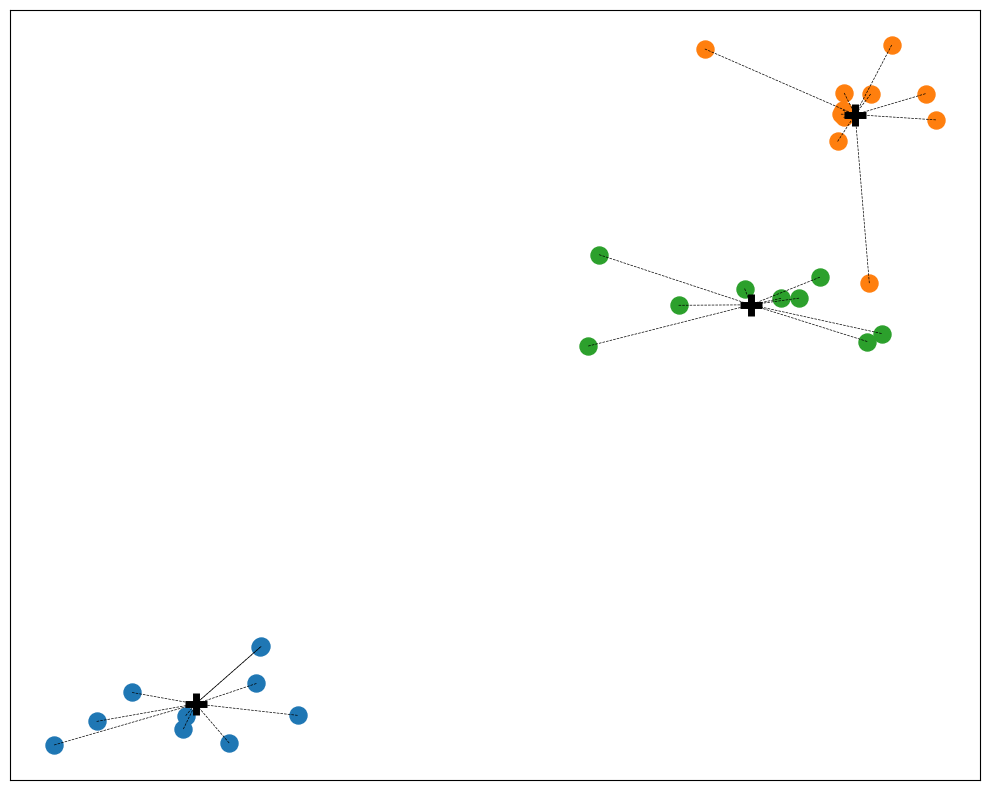

In [11]:
clusters, centroids = kmeans(X_kmeans, 3)
print(clusters)
print(centroids)
print(calculate_sse(X_kmeans, clusters, centroids))

plot_clusters(X_kmeans, clusters, centroids)

### 1.5 Choosing a Good Value for k (5 Points)

So far, we generated our own dataset, and we kind of knew how many clusters there are (see `centers` parameter in the method `make_blobs()`. Also all data points had just 2 Euclidian coordinates, so it was easy to plot and inspect the data (see parameter `n_features=2`). In short, it was rather straightforward to pick the best value for k.

In practice, we don't know how the data distribution looks like, and we can typically not plot them due to the high(er) number of features. This makes picking a good value for k difficult. In the lecture, you've learned about the "Elbow Method" which you will apply in the following on an example dataset.

First let's load the data...

In [15]:
df_kmeans = pd.read_csv('data/kmeans-demo-data.csv', header=None)

X_kmeans_highdim = df_kmeans.to_numpy()

num_samples, num_dimensions = X_kmeans_highdim.shape

print('The sample dataset has {} data points; each data point has {} attributes.'.format(num_samples, num_dimensions))

The sample dataset has 1000 data points; each data point has 5 attributes.


**Task 2.5a) (3 Points)** Implement the method `evaluate_k()` that returns the SSE values for differen choices of k ranging from 2 to `max_k` for a dataset `X`. We provide you with the method `calculate_sse()` to calculate the SSE for clustering.

In [23]:
def evaluate_k(X, max_k=30):

    sse_values = []

    for k in range (2, max_k+1):
        
        ### Your code starts here ###############################################################
        #
        # Note that the SSE value for each k will depend on the initialization.
        # You should there run kmeans2 multiple times (e.g., 10) and record only the lowest sse value
        #
        temp_sse = float('inf')
        for i in range(1, 40):
            clusters, centroids = kmeans(X, k)
            sse_cluster = calculate_sse(X,clusters, centroids)
            if( sse_cluster< temp_sse):
                temp_sse = sse_cluster
            i = i +1
        sse_values.append([k,temp_sse])

        ### Your code ends here #################################################################
        
        # Only there so the empty loop does not throw an error
        # (you can remove that once you added your code)
        pass
        
    # Convert to numpy array to make the plotting easier 
    np.set_printoptions(suppress=True)
    sse_values = np.array(sse_values)
    
    return sse_values


# sse_values should contain the lowest SSE value for each k
# 
# Example format: sse_values = [ [2, 1000], [3, 340], [4, 121], ... ]
#
sse_values = evaluate_k(X_kmeans_highdim)
print(sse_values)

[[     2.         122958.0329178 ]
 [     3.          97110.41615107]
 [     4.          92255.16968194]
 [     5.          87691.83235206]
 [     6.          79142.62888568]
 [     7.          76870.74821452]
 [     8.          69877.85312023]
 [     9.          67594.32215896]
 [    10.          55392.52084012]
 [    11.          68604.40056674]
 [    12.          67436.52209464]
 [    13.          62797.02392748]
 [    14.          56854.8361285 ]
 [    15.          58440.65998441]
 [    16.          54397.76866117]
 [    17.          53928.85434819]
 [    18.          54232.60898506]
 [    19.          52154.50510682]
 [    20.          48890.21086248]
 [    21.          50757.25967141]
 [    22.          52646.53624594]
 [    23.          50325.81435159]
 [    24.          51169.61864505]
 [    25.          52304.82860841]
 [    26.          50007.40986477]
 [    27.          46652.10294899]
 [    28.          47368.61558882]
 [    29.          47034.1328795 ]
 [    30.          4

Let's plot the results

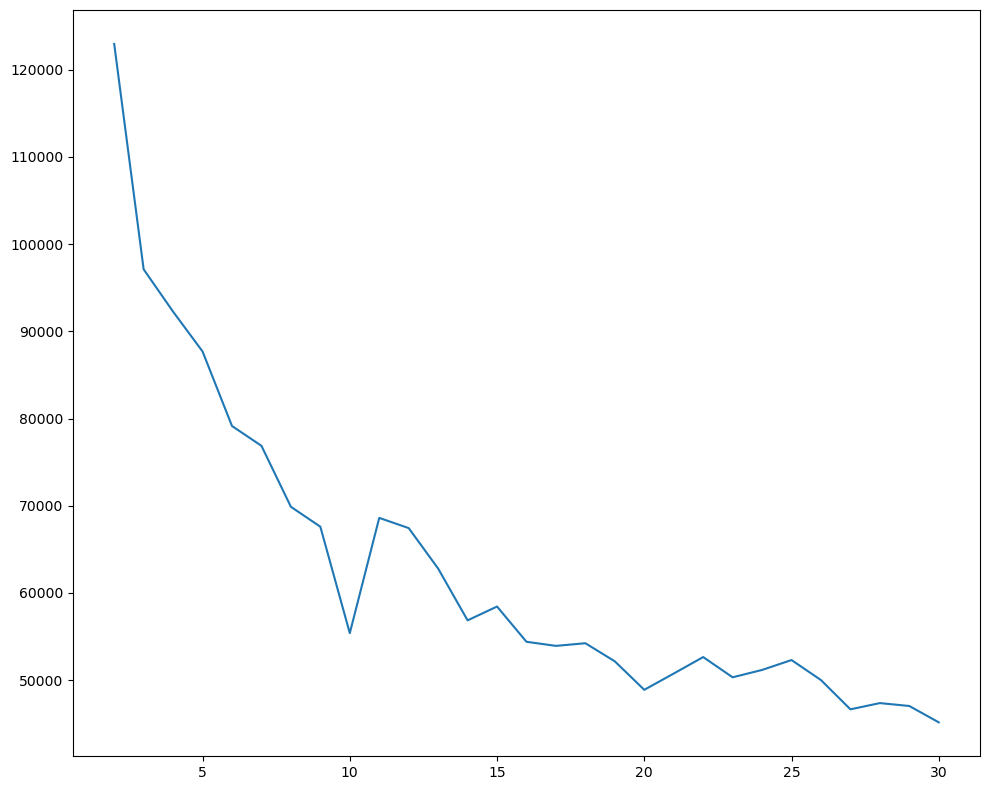

In [24]:
# Throws an error if sse_values is empty or does not habe the right format/shape
plt.figure()
plt.plot(sse_values[:,0], sse_values[:,1])
plt.tight_layout()
plt.show()

**Question 1.5b) (2 Points)**  Which seems to be a suitable value for k? Briefly explain your decision!

**Your Answer:** k = 10 seems the most suitable choice. Generally speaking, SSE will decrease as k value increasing. However, the clustering will be meaningless when k becomes too large. To balance the practical meaning of clustering and SSE, I decided to choose k = 10 after running code several times.

------------------------------------

## 2 Playing the Cluster Algorithms (18 points)

DBSCAN and Hierarchical Clustering (AGNES) take arguably some more effort to properly implement. To check your understanding of both algorithms, you will therefore "manually" apply DBSCAN and AGNES on two toy datasets.

### 2.1 DBSCAN

In the following, you will show your understanding of DBSCAN by calculating the result of the algorithm over a very simple dataset.

First, let's load the data.

In [26]:
df_dbscan = pd.read_csv('data/dbscan-demo-data.csv', header=None)

# Convert dataframe with coordinates to numpy array
X_dbscan = df_dbscan.to_numpy()
# Label all data points from 0 to (N-1), with N = #points
labels_dbscan = list(range(X_dbscan.shape[0]))
print(labels_dbscan)
print(X_dbscan.shape[0])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
18


For the upcoming task, you can make your life easier by plotting the data points by the method `plot_labeled_data` that we provide. This method allows you to plot a circle at a coordinate and with a radius of your choice.

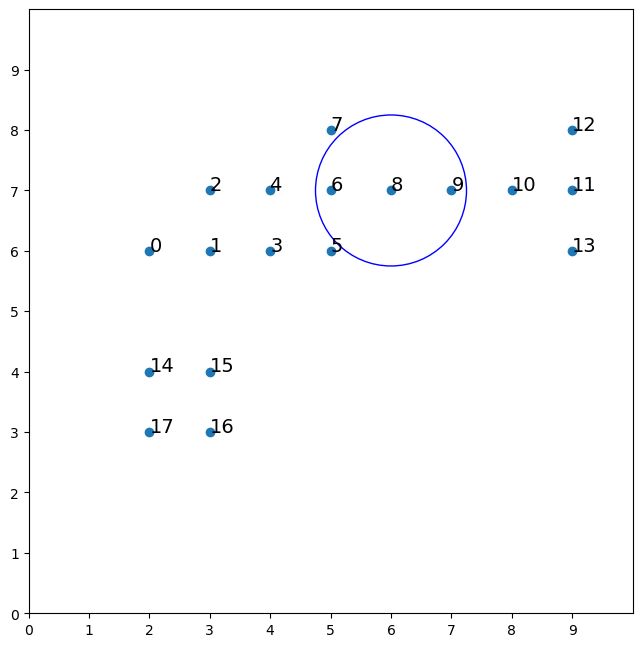

In [29]:
plot_labeled_data(X_dbscan, labels_dbscan, circle_coords=[6,7], circle_radius=1.25)

**Task 2.1a) (4 points)** Identify all core, border, noise points after DBSCAN has been applied on the data as shown above with `epsilon=1.25` and `MinPts=4`! The orders of the labels in the 3 lists do not matter


In [38]:
dbscan_core_points = [1,3,4,6,11]           # Example format: dbscan_core_points = [0, 1, 2, ...]

dbscan_border_points = [0,2,5,7,8,10,12,13]         # Example format: dbscan_border_points = [0, 1, 2, ...]

dbscan_noise_points = [9,14,15,16,17]          # Example format: dbscan_noise_points = [0, 1, 2, ...]

**Task 2.1b) (3 points)** Identify all clusters after DBSCAN has been applied on the data as shown above with `epsilon=1.25` and `MinPts=4`! The result should be a list of clusters, with cluster containing the labels of the data points within the cluster. Note that the orders of the clusters and data points within each cluster do not matter -- that is, 

`[ [0, 1], [2] ]` and `[ [2], [1, 0] ]` 

represent the same clustering.

In [40]:
# Example format
#
# clustering_dbscan = [ 
#     [0, 1, 2, ...],
#     ...
# ]

clustering_dbscan = [
    [[1,3,4,6,0,2,5,7,8],
     [11,10,12,13]
    ]
]

**Question 2.1c) (2 points)** Can you add **2 data points** such that the resulting clustering contains only 1 cluster and no noise? If so, give the coordinates for both points!

In [50]:
# Example format
#
# X_dbscan_extra = [ [x1,y1], [x2, y2] ]


X_dbscan_extra = [[3, 5], [7, 6]]  # (keep the empty list if such 2 points do not exist)

### 2.2 Hierarchical Cluster (AGNES) (10 Points)

In the following, you will show your understanding of Hierarchical Clustering (AGNES) by calculating the result of the algorithm over a very simple dataset.

First, let's load the data.

In [51]:
df_agnes = pd.read_csv('data/agnes-demo-data.csv', header=None)

# This dataset has the data points labeled with capital letters
labels_agnes = df_agnes[0].to_list()
# Convert coordinate columns of the dataframe with coordinates to numpy array
X_agnes = df_agnes[[1,2]].to_numpy()

For the upcoming task, you can make your life easier by plotting the data points by the method plot_labeled_data that we provide. For your convenience, we show the grid to make the calculation of distances easier.

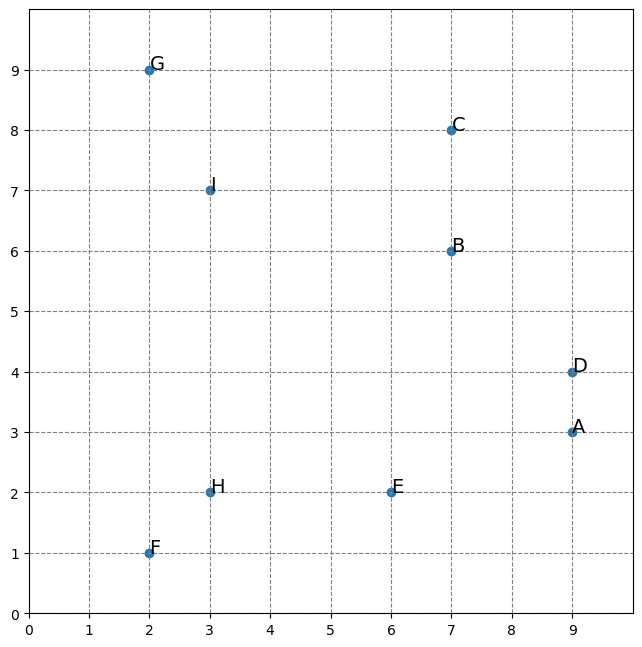

In [21]:
plot_labeled_data(X_agnes, labels_agnes, show_grid=True)

In the following 2 tasks, perform Hierarchical Clustering (AGNES) step by step on the dataset above. After each step write down the current set of clusters and the value of the shortest distance! 

* Denote a clusters as a string of the labels of the points forming a cluster. For example, `XYZ` denotes the cluster containing the data points labeled X, Y, and Z -- the order is not important, i.e., clustering `['X', 'YZ']` is equal to `['ZY', 'X']`

* For each step, write down the shortest distance between the two clusters merged in each step. Note that the points are conveniently placed to make the calculation of distances pretty straightforward. If needed, round the distances to 2 decimal places (e.g., `sqrt(2) = 1.41`)

Below you can see an example:

In [22]:
# Example Format
#
# agnes_clusters = [
#     (None, ['X', 'Y', 'Z']),   # At the start, each data point forms a cluster
#     (1.22, ['Y', 'XZ']),       # Cluster X and Z where closest with a distance of 1.22
#     (2.00, ['XYZ']),           # Cluster XZ and y where closest with a distance of 2.0
#     (None, ['XYZ'])            # At the end, all data points are within a single cluster
# ]

**Task 2.2a) (5 Points)** Perform AGNES step by step using **Single Linkage**!

In [52]:
agnes_clusters_single = [
    (None, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']), # At start, each data point forms a cluster
    (1,['AD','B', 'C', 'E', 'F', 'G', 'H', 'I']),
    (1.41,['AD', 'FH','B', 'C', 'E', 'G', 'I']),
    (2,['AD', 'FH','BC', 'E', 'G', 'I']),
    (2.24,['AD', 'FH','BC' ,'E','GI']),
    (2.83,['ADBC', 'FH', 'E', 'GI']),
    (3,['ADBC', 'FHE', 'GI']),
    (3.16,['ADBCFHE', 'GI']),
    (4.12,['ADBCFHEGI']),
    (None, ['ABCDEFGHI'])       # At the end, all data points are within a single cluster
]

**Task 2.2b) (5 Points)** Perform AGNES step by step using **Complete Linkage**!

In [53]:
agnes_clusters_complete = [
    (None, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']), # At start, each data point forms a cluster
    (1,['AD','B', 'C', 'E', 'F', 'G', 'H', 'I']),
    (1.41,['AD', 'FH','B', 'C', 'E', 'G', 'I']),
    (2,['AD', 'FH','BC', 'E', 'G', 'I']),
    (2.24,['AD', 'FH','BC' ,'E','GI']),
    (3.61,['ADE', 'FH','BC', 'GI']),
    (5.83,['ADE', 'FH','BCGI']),
    (7.62,['ADEFH','BCGI']),
    (9.22,['ADEFHBCGI']),
    (None, ['ABCDEFGHI'])       # At the end, all data points are within a single cluster
]

------------------------------------------------------

## 3. Questions (10 Points)

K-Means, DBSCAN, and AGNES are rather different in their approach to identify clusters in a dataset. The following set of questions focus on their difference when it comes to applying them in practice. 

**Questions 3a)-3d) (1 Point each)** expect as answer the set of algorihtms for which the questions is true. Please use `kmeans`, `dbscan` and `agnes` as labels to refer to the 3 algorithms. Example: *"Which clustering algoritms do to return a hierarchical clustering?" -- Answer: `['dbscan', 'kmeans']`; the order doesn't matter. If the answer is not true for any algorithm, simply use the empty list `[ ]`.

**Question 3e) and 3f) (3 Points each)** expect plain text answers.

----------------------------------------------------------------------------------------

**Question 3a) (1 Point)** Which clustering algorithms guarantee no empty cluster?

In [25]:
q3_a = ['agnes' ]

**Question 3b) (1 Point)** Which clustering algorithms return the same set of cluster after the data points -- all values/coordinates in the Euclidean space -- have all been shifted (addition or subtraction) by a constant value?

In [26]:
q3_b = ['dbscan','agnes' ]

**Question 3c) (1 Point)** Which clustering algorithms return the same set of cluster after the data points -- all values/coordinates in the Euclidean space -- have all been multiplied by a constant factor?

In [27]:
q3_c = ['kmeans','agnes']

**Question 3d) (1 Point)** Which clustering algorithms generally return different sets of clusters if the data has been normalized/standardized?

In [28]:
q3_d = ['kmeans','dbscan','agnes']

**Question 3e) (3 Point)** Which clustering algorithms generally return a clusterting that can directly be used to spot potential outliers? Briefly explain for K-Mean, DBSCAN and AGNES, if and how the clustering results can be used to identify outliers.

**Your answer:**DBSCAN and AGNES. 
DBSCAN could scan all the points and create clusters based on the neighbors around each point, if suitable parameters are given, all the points which are not included in any cluster could be treated as outliers. 
AGNES could scan all the points too, and every point will has its cluster at the last because AGNES would merge all the clusters into one. The key AGNES could be used to find outliers is the evaluation of clustering. We could cut the final dendrogram at the best level based on the evaluation of clustering, for example, based on Silhouette value. After cutting the final dendrogram with the best Silhouette value, we could determine that all the clusters whose number of points are less than a pre-set value are outliers.

**Question 3f) (3 Points)** Assume your dataset contains the geolocations of all active taxes (busy or on call) in Singapore on a Friday 6pm. Which clustering method(s) you learned in the lectures are most suitable to find stretches with many taxis in the same area? Briefly explain you choices!

**Your answer:**DBSCAN is the most suitable method. Because the same area where many taxes locate always means it's an area that is easy to get a business or it's an area with traffic jam. Let's take the former situation as example, those taxes always wait for potential customers with close distance. For example, many taxes always wait in line at the airport exit, which would lead to a high density of the area. In this case, DBSCAN which is a density-based algorithm seems suitable most. Futhermore, DBSCAN is better than AGNES when considering the time cost.